**AUTHOR**:     ERYL KENN VICTORINO  
**PURPOSE**:    ARTIFICIAL NEURAL NETWORKS (ANN) TUTORIAL  
*from 'Machine Learning A-Z™: Hands-On Python & R In Data Science' on Udemy by Kirill Eremenko, Hadelin de Ponteves, and the SuperDataScience Team*  
**MOD DATE**:   4/20/2019

# PART 1: DATA PREPROCESSING

## IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.compose import ColumnTransformer

## IMPORT DATASET

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

## ENCODE CATEGORICAL VARIABLES

In [3]:
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(categories='auto'), [1, 2])],
                        remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float)

>*prevent dummy varible trap*

In [4]:
X1 = X[:, 1:3]
X2 = X[:, 4:13]
X = np.concatenate((X1, X2), axis=1)

## TRAINING/TEST SPLIT

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## FEATURE SCALING

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# PART 2: CREATE ANN

## INITIALIZE ANN

In [7]:
classifier = Sequential()

## ADD INPUT LAYER AND FIRST HIDDEN LAYER

>*to get "units", take the average of the number of nodes in the input layer (11) and output layer(1) = (11+1)/2 = 6  
initialize the weights to a uniform distribution  
use a rectifier ("relu") activation function for the hidden layers*

In [8]:
classifier.add(Dense(activation = 'relu', input_dim = 11, units = 6, kernel_initializer = 'uniform'))

## ADD SECOND HIDDEN LAYER

In [9]:
classifier.add(Dense(activation = 'relu', units = 6, kernel_initializer = 'uniform'))

## ADD OUTPUT LAYER

>*use a "sigmoid" activation function for the output layer*

In [10]:
 classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

## COMPILE ANN

>*use "adam" stochastic gradient descent for optimizer  
use "binary_crossentropy" loss function since it is logarithmic and has a binary outcome  
use "categorical_crossentropy" for loss if it is more than two categories  
use the "accuracy" criterion to evaluate the model*

In [11]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## ANN FIT ON TRAINING SET

>*no rule of thumb for "batch_size" and "nb_epoch", must be experimented with a bit*

In [12]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.79 - 1s 121us/sample - loss: 0.4963 - accuracy: 0.7959
Epoch 2/100
8000/8000 [==============================] - 1s 102us/sample - loss: 0.4321 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 105us/sample - loss: 0.4280 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 102us/sample - loss: 0.4233 - accuracy: 0.7971
Epoch 5/100
8000/8000 [==============================] - 1s 102us/sample - loss: 0.4190 - accuracy: 0.8202
Epoch 6/100
8000/8000 [==============================] - 1s 100us/sample - loss: 0.4162 - accuracy: 0.8250
Epoch 7/100
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4148 - accuracy: 0.8299
Epoch 8/100
8000/8000 [==============================] - 1s 96us/sample - loss: 0.4128 - accuracy: 0.8301
Epoch 9/100
8000/8000 [==============================] - 1s 95us/sample - loss: 0.4118 - accuracy: 0.833

8000/8000 [==============================] - 1s 111us/sample - loss: 0.4008 - accuracy: 0.8344
Epoch 77/100
8000/8000 [==============================] - 1s 101us/sample - loss: 0.4006 - accuracy: 0.8341
Epoch 78/100
8000/8000 [==============================] - 1s 100us/sample - loss: 0.4006 - accuracy: 0.8334
Epoch 79/100
8000/8000 [==============================] - 1s 100us/sample - loss: 0.4007 - accuracy: 0.8349
Epoch 80/100
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4006 - accuracy: 0.8331
Epoch 81/100
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4012 - accuracy: 0.8344
Epoch 82/100
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4005 - accuracy: 0.8336
Epoch 83/100
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4005 - accuracy: 0.8346
Epoch 84/100
8000/8000 [==============================] - 1s 99us/sample - loss: 0.4002 - accuracy: 0.8344
Epoch 85/100
8000/8000 [======================

# PART 3: PREDICT AND EVALUATE MODEL

## PREDICTION ON TEST SET

In [13]:
y_prob = classifier.predict(X_test)
y_pred = (y_prob > 0.5)

## CONFUSION MATRIX

In [14]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1549   46]
 [ 267  138]]


## ANN ROC AND AUC

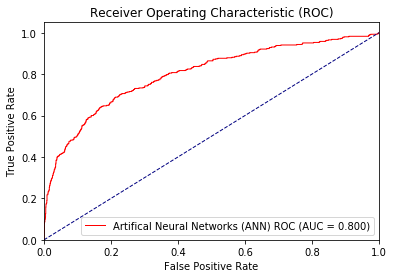

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'red', lw = 1, label = 'Artifical Neural Networks (ANN) ROC (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 1, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()